### Activity

The target use cases for this activity are **hand-drawn shapes and doodles**. It is important to consider that not all shapes can be regularized. Your algorithm should be able to distinguish between them. Test your algorithms with different images containing various shapes and verify the results.


### Approach

Instead of using CSV files, we trained a model based on the **Easier Doodle Dataset** prepared by our mentor, **Mr. Ashish Jangra**. We selected a few images from this dataset and divided them into 5 categories:

- **0 :** Circle and Ellipse
- **1 :** Rectangles & Rounded Rectangles
- **2 :** Straight Lines
- **3 :** Star
- **4 :** Regular Polygon

You can find the dataset on Kaggle: [Easier Doodle Dataset](https://www.kaggle.com/code/ashishjangra27/easier-doodle-dataset)


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Import necessary libraries
import os
from PIL import Image
import numpy as np

def load_and_resize_doodles(input_folders, base_path, size=(28, 28)):
    # Initialize an empty list to hold the processed images
    X = []

    # Iterate through each folder in the input list
    for folder in input_folders:
        input_folder = os.path.join(base_path, folder)
        if not os.path.exists(input_folder):
            print(f"Folder not found: {input_folder}")
            continue

        for filename in os.listdir(input_folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(input_folder, filename)
                try:
                    with Image.open(file_path) as img:
                        # Convert to grayscale
                        img = img.convert('L')

                        # Resize the image
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert image to numpy array
                        img_array = np.array(img_resized)

                        # Invert the image (assuming doodles are dark on light background)
                        img_array = 255 - img_array

                        # Enhance contrast
                        img_array = np.clip(img_array * 1.5, 0, 255).astype(np.uint8)

                        # Normalize to [0, 1]
                        img_array = img_array / 255.0

                        # Append to X
                        X.append(img_array)

                        print(f"Processed: {file_path}")

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    if len(X) == 0:
        print("No images processed. Please check your input folders and file formats.")
        return None

    # Convert list to numpy array
    X = np.array(X)

    print(f"Total images processed: {len(X)}")
    return X

# Usage example:
base_path = 'D:/adobe gensolve/Dataset'  # Adjust to your actual base path
input_folders = [
    'Circles & Ellipses',
    'Rectangles & Rounded Rectangles',
    'Straight Lines',
    'Star',
    'Regular Polygons'
]

# Load and process images from the specified folders
X = load_and_resize_doodles(input_folders, base_path)

# Print the shape of the processed image data and the shape of individual images
if X is not None:
    print(f"X shape: {X.shape}")
    print(f"Shape of each image: {X[0].shape}")


Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock1.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock10.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock11.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock12.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock13.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock14.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock15.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock16.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock17.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock18.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock19.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock2.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellipses\AlarmClock20.png
Processed: D:/adobe gensolve/Dataset\Circles & Ellips

In [4]:
X[10].shape

(28, 28)

In [5]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00392157, 0.00392157, 0.00392157,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

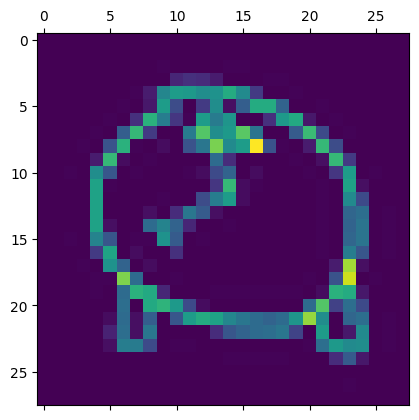

In [6]:
plt.matshow(X[12])

In [8]:
y = np.concatenate([
    np.full(441,0),
    np.full(205, 1),
    np.full(150, 2),
    np.full(116, 3),
    np.full(191, 4)
])

# Labels
# 0 -> circle and ellipse
# 1 -> Rectangles & Rounded Rectangles
# 2 -> Straight Lines
# 3 -> Star
# 4 -> Regular polygon

In [9]:
y.shape

(1103,)

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
indices = np.arange(len(y))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
X_train.shape

(992, 28, 28)

In [12]:
y_train.shape

(992,)

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened.shape

(992, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.        , 0.00392157, 0.00392157, 0.00392157, 0.     

In [16]:
y_test[:100]

array([1, 2, 3, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 4, 4, 0, 2, 1, 0, 2,
       3, 0, 3, 1, 3, 4, 0, 0, 2, 1, 2, 0, 0, 0, 0, 3, 3, 2, 2, 4, 0, 0,
       2, 2, 2, 4, 4, 0, 2, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 1, 4, 1, 3, 2,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 4, 2, 3, 0, 4, 0, 1, 4, 4, 1,
       0, 2, 3, 2, 4, 0, 0, 4, 2, 0, 0, 0])

In [17]:

from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = tf.keras.Sequential([
    # Reshape the input from (784,) to (28, 28, 1)
    layers.Reshape((28, 28, 1), input_shape=(784,)),

    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')  # 5 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=100, validation_split=0.1)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2674 - loss: 2.0671 - val_accuracy: 0.3900 - val_loss: 1.5392
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3649 - loss: 1.6099 - val_accuracy: 0.3900 - val_loss: 1.5144
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4816 - loss: 1.2974 - val_accuracy: 0.3900 - val_loss: 1.4917
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6057 - loss: 1.0543 - val_accuracy: 0.4400 - val_loss: 1.4661
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6129 - loss: 0.9576 - val_accuracy: 0.3900 - val_loss: 1.4336
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7083 - loss: 0.7455 - val_accuracy: 0.1800 - val_loss: 1.5274
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7395 - loss: 0.7006 - val_accuracy: 0.2000 - val_loss: 1.4787
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7995 - loss: 0.5544 - val_accuracy: 0.3800 - val_l

In [18]:
evaluation = model.evaluate(X_test_flattened, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

predictions = model.predict(X_test_flattened)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8742 - loss: 0.6190
Test Loss: 0.6980171799659729
Test Accuracy: 0.8468468189239502
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [19]:
vector = predictions[12]
max_index = np.argmax(vector)
max_index

# Labels
# 0 -> circle and ellipse
# 1 -> Rectangles & Rounded Rectangles
# 2 -> Straight Lines
# 3 -> Star
# 4 -> Regular polygon

0

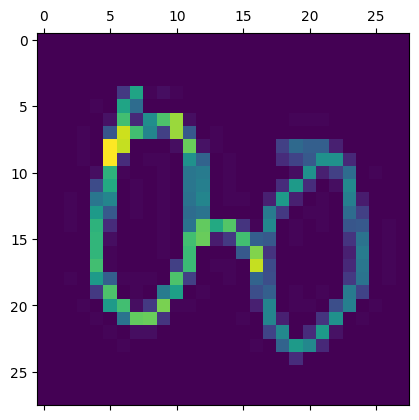

In [20]:
plt.matshow(X_test[12])